# Problem statement:-
   The objective here identify top 3 agents of the brokerage along with providing advice on what can be done to help other agents improve -
        1. Extract agent specific features from the provided followup data
        2. Develop basic rating algorithm to Identify top 3 agents
        3. Build final report with insights and recommendations


## 1. Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

%matplotlib inline

# 2. Loading the dataset

In [2]:
data=pd.read_csv("agent_followup_data - Dataset.csv")

# 3. Exploratory Data Analysis

In [3]:
# Checking first 5 rows of the dataset

data.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data
0,1,2020-03-05 14:38:54,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
1,2,2020-03-05 14:38:55,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
2,3,2020-01-06 19:11:39,2019-12-26 08:30:32-05:00,49122,calls,4,"{'duration': 91, 'is_incoming': False}"
3,4,2020-08-31 13:12:53,2020-08-30 19:39:18-04:00,58040,calls,9,"{'duration': 0, 'is_incoming': False}"
4,5,2020-10-14 14:47:23,2017-01-28 11:04:00-05:00,36567,calls,9,"{'duration': 0, 'is_incoming': False}"


In [4]:
# Checking last 5 rows of the dataset

data.tail()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data
68349,68350,2020-03-11 21:10:18,2018-03-17 09:09:00-04:00,31965,textmessages,4,{'is_incoming': True}
68350,68351,2020-03-11 21:11:12,2018-03-17 09:09:00-04:00,31965,textmessages,4,{'is_incoming': False}
68351,68352,2020-03-20 17:08:10,2018-03-17 09:09:00-04:00,31965,textmessages,4,{'is_incoming': False}
68352,68353,2020-06-05 15:24:48,2017-12-05 05:10:00-05:00,27972,textmessages,7,{'is_incoming': False}
68353,68354,2020-01-22 20:26:54,2019-07-16 09:56:00-04:00,16281,textmessages,4,{'is_incoming': False}


In [5]:
# So let's see what columns we have here

data.columns

Index(['id', 'followup_date', 'lead_created_at', 'leadId', 'followup_type',
       'agentId', 'additional_data'],
      dtype='object')

In [6]:
# Shape of the dataset

data.shape

(68354, 7)

In [7]:
# Size of the dataset

data.size

478478

In [8]:
# Types of the dataset

data.dtypes

id                  int64
followup_date      object
lead_created_at    object
leadId              int64
followup_type      object
agentId             int64
additional_data    object
dtype: object

### So we have total of 68354 rows with 7 columns. Now we going to check some statistical analysis of the dataset and find the inferences.

In [9]:
#  Basic Statistical Summary 

data.describe()

,id,leadId,agentId
count,68354.000000,68354.000000,68354.000000
mean,34177.500000,41258.100009,6.399450
std,19732.244487,18529.817170,2.492149
min,1.000000,1.000000,0.000000
25%,17089.250000,29136.250000,4.000000
50%,34177.500000,49991.500000,6.000000
75%,51265.750000,53175.000000,9.000000
max,68354.000000,63511.000000,10.000000


In [10]:
# Checking for the null values

print(data.isnull().sum())

id                 0
followup_date      0
lead_created_at    0
leadId             0
followup_type      0
agentId            0
additional_data    0
dtype: int64


So our data looks good as we do not have Null values

# 4. Data cleaning

In [11]:
# Dealing with the last column

df = data['additional_data']

In [12]:
is_incoming=[]
for each in df:
    is_incoming.append(each[-6:-1].replace(" ", ""))
print(is_incoming)
print(len(is_incoming))


['False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'True', 'False', 'False', 'True', 'True', 'True', 'True', 'False', 'False', 'False', 'True', 'False', 'False', 'True', 'False', 'True', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'True', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'False', 'True', 'False', 'False', 'False', 'False', 'False', 'True', 'False', 'False', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'False', 'F

In [13]:
duration_colmn=[]
for each in df:
    res=re.findall('\d',each)
    res="".join(res)
    duration_colmn.append(res)
print(duration_colmn[-1])
print(len(duration_colmn))


68354


In [14]:
duration_colmn=np.array(duration_colmn)

In [15]:
lst=[]
for i in duration_colmn:
    try:
        lst.append(i.astype(int))
    except ValueError as err:
        lst.append(0)

In [16]:
print(lst)

[0, 0, 91, 0, 0, 466, 77, 54, 11, 52, 0, 89, 0, 16, 16, 23, 23, 149, 15, 304, 68, 151, 1084, 0, 14, 977, 0, 0, 61, 57, 38, 128, 190, 86, 1, 5, 9, 215, 0, 0, 4, 16, 0, 0, 0, 0, 0, 0, 38, 51, 40, 0, 0, 1059, 41, 0, 0, 0, 0, 0, 52, 171, 13, 8, 30, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 14, 54, 0, 6, 1, 59, 0, 59, 41, 62, 19, 39, 59, 5, 46, 0, 0, 0, 24, 0, 95, 0, 0, 5, 47, 30, 0, 52, 53, 17, 13, 44, 23, 78, 0, 0, 0, 36, 44, 0, 0, 52, 0, 0, 50, 57, 56, 635, 141, 0, 0, 63, 0, 261, 0, 0, 349, 24, 0, 23, 0, 0, 0, 0, 47, 0, 0, 61, 44, 81, 0, 0, 0, 0, 3, 0, 48, 0, 0, 0, 53, 9, 56, 46, 94, 0, 46, 55, 69, 38, 0, 55, 0, 34, 52, 17, 19, 19, 67, 0, 18, 8, 55, 0, 0, 47, 0, 6, 96, 43, 39, 64, 26, 0, 0, 91, 0, 37, 111, 28, 0, 0, 0, 9, 0, 0, 137, 39, 34, 51, 0, 42, 54, 84, 0, 0, 0, 55, 0, 0, 39, 47, 0, 0, 0, 37, 35, 49, 0, 49, 42, 53, 398, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 64, 8, 24, 31, 73, 77, 50, 42, 27, 43, 60, 47, 59, 53, 73, 53, 106, 14, 54, 87, 170, 0, 0, 36, 61, 290, 25, 0, 7, 0, 0, 0, 111

In [17]:
# Dropping the additional data as we already have separated it.

data.drop("additional_data", axis = 1, inplace=True)

In [18]:
data['duration_in_sec']=lst

In [19]:
data['is_incoming']=is_incoming

In [20]:
print(data)

          id        followup_date            lead_created_at  leadId  \
0          1  2020-03-05 14:38:54  2019-11-04 16:12:00-05:00   20293   
1          2  2020-03-05 14:38:55  2019-11-04 16:12:00-05:00   20293   
2          3  2020-01-06 19:11:39  2019-12-26 08:30:32-05:00   49122   
3          4  2020-08-31 13:12:53  2020-08-30 19:39:18-04:00   58040   
4          5  2020-10-14 14:47:23  2017-01-28 11:04:00-05:00   36567   
...      ...                  ...                        ...     ...   
68349  68350  2020-03-11 21:10:18  2018-03-17 09:09:00-04:00   31965   
68350  68351  2020-03-11 21:11:12  2018-03-17 09:09:00-04:00   31965   
68351  68352  2020-03-20 17:08:10  2018-03-17 09:09:00-04:00   31965   
68352  68353  2020-06-05 15:24:48  2017-12-05 05:10:00-05:00   27972   
68353  68354  2020-01-22 20:26:54  2019-07-16 09:56:00-04:00   16281   

      followup_type  agentId  duration_in_sec is_incoming  
0             calls       10                0       False  
1             c

In [21]:
# Checking the statistical analysis after cleaning the data

data.describe()

,id,leadId,agentId,duration_in_sec
count,68354.000000,68354.000000,68354.000000,68354.000000
mean,34177.500000,41258.100009,6.399450,2.833177
std,19732.244487,18529.817170,2.492149,34.718172
min,1.000000,1.000000,0.000000,0.000000
25%,17089.250000,29136.250000,4.000000,0.000000
50%,34177.500000,49991.500000,6.000000,0.000000
75%,51265.750000,53175.000000,9.000000,0.000000
max,68354.000000,63511.000000,10.000000,2461.000000


In [22]:
# Checking the data again

data.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,duration_in_sec,is_incoming
0,1,2020-03-05 14:38:54,2019-11-04 16:12:00-05:00,20293,calls,10,0,False
1,2,2020-03-05 14:38:55,2019-11-04 16:12:00-05:00,20293,calls,10,0,False
2,3,2020-01-06 19:11:39,2019-12-26 08:30:32-05:00,49122,calls,4,91,False
3,4,2020-08-31 13:12:53,2020-08-30 19:39:18-04:00,58040,calls,9,0,False
4,5,2020-10-14 14:47:23,2017-01-28 11:04:00-05:00,36567,calls,9,0,False


## 5. Checking for the unique count and value count to know what each column holds

In [23]:
# Checking unique value for the followup_data.

data.followup_type.unique()

array(['calls', 'emails', 'textmessages'], dtype=object)

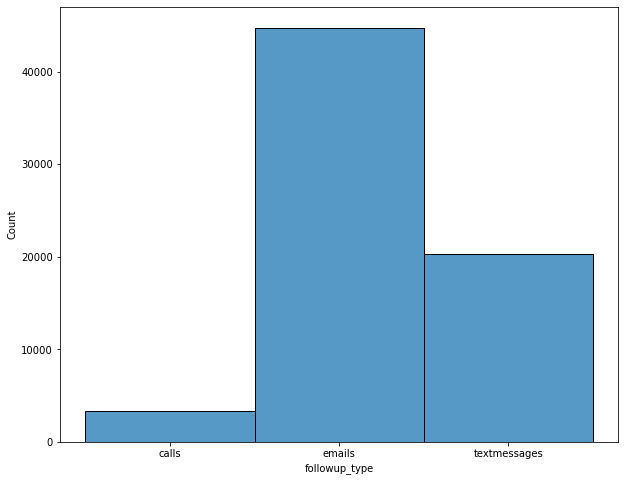

In [24]:
plt.figure(figsize=(10,8))
sns.histplot(data["followup_type"])
plt.show()

In [25]:
# Checking unique value for the agentId.

data.agentId.unique()

array([10,  4,  9,  7,  8,  2,  6,  5,  3,  0], dtype=int64)

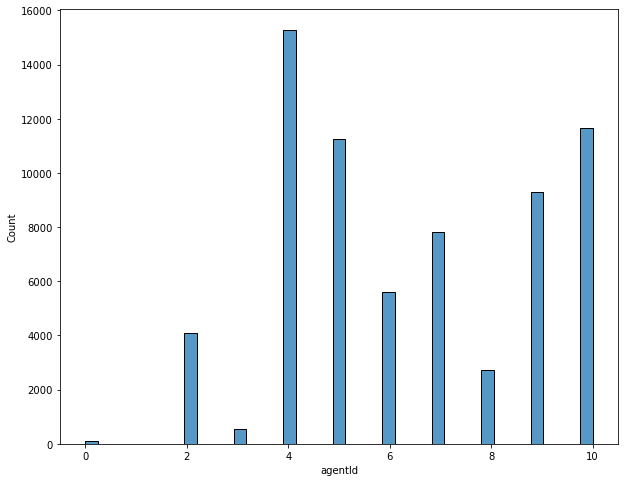

In [26]:
plt.figure(figsize=(10,8))
sns.histplot(data["agentId"])
plt.show()

In [27]:
data['leadId'].value_counts()

6572     3914
53123    2974
53139    2955
53175    2851
36825    1084
         ... 
60886       1
31699       1
56848       1
2987        1
26982       1
Name: leadId, Length: 6689, dtype: int64

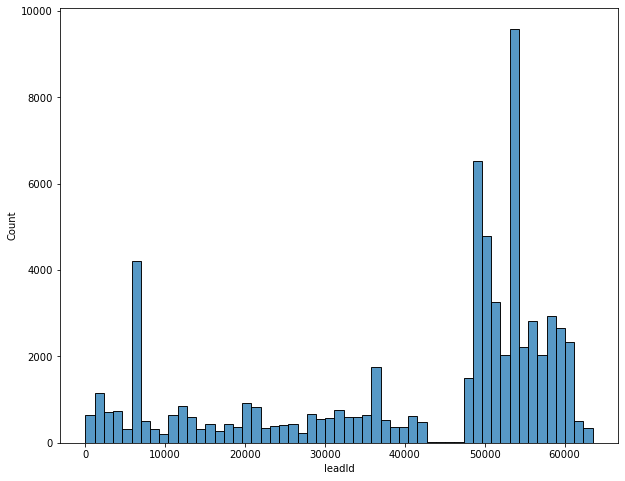

In [28]:
plt.figure(figsize=(10,8))
sns.histplot(data["leadId"])
plt.show()

In [29]:
# Checking the value counts of each columns containing sub-columns

data['followup_type'].value_counts()

emails          44757
textmessages    20292
calls            3305
Name: followup_type, dtype: int64

In [30]:
data['agentId'].value_counts()

4     15290
10    11655
5     11241
9      9281
7      7819
6      5606
2      4086
8      2732
3       529
0       115
Name: agentId, dtype: int64

In [31]:
data['duration_in_sec'].value_counts()

0      66481
43        34
38        33
53        33
46        32
       ...  
597        1
685        1
213        1
149        1
191        1
Name: duration_in_sec, Length: 369, dtype: int64

In [32]:
data['is_incoming'].value_counts()

False    51213
True     17141
Name: is_incoming, dtype: int64

In [33]:
data['leadId'].value_counts()

6572     3914
53123    2974
53139    2955
53175    2851
36825    1084
         ... 
60886       1
31699       1
56848       1
2987        1
26982       1
Name: leadId, Length: 6689, dtype: int64

In [34]:
# Checking the dataset again

data.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,duration_in_sec,is_incoming
0,1,2020-03-05 14:38:54,2019-11-04 16:12:00-05:00,20293,calls,10,0,False
1,2,2020-03-05 14:38:55,2019-11-04 16:12:00-05:00,20293,calls,10,0,False
2,3,2020-01-06 19:11:39,2019-12-26 08:30:32-05:00,49122,calls,4,91,False
3,4,2020-08-31 13:12:53,2020-08-30 19:39:18-04:00,58040,calls,9,0,False
4,5,2020-10-14 14:47:23,2017-01-28 11:04:00-05:00,36567,calls,9,0,False


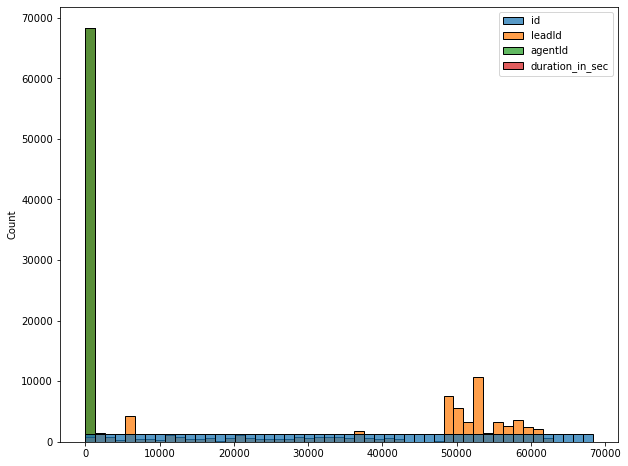

In [35]:
plt.figure(figsize=(10,8))
sns.histplot(data)
plt.show()

## 6. Dropping the "id" column as it does not contribute major value

In [36]:
data.drop('id', axis = 1, inplace = True)
data.head()

,followup_date,lead_created_at,leadId,followup_type,agentId,duration_in_sec,is_incoming
0,2020-03-05 14:38:54,2019-11-04 16:12:00-05:00,20293,calls,10,0,False
1,2020-03-05 14:38:55,2019-11-04 16:12:00-05:00,20293,calls,10,0,False
2,2020-01-06 19:11:39,2019-12-26 08:30:32-05:00,49122,calls,4,91,False
3,2020-08-31 13:12:53,2020-08-30 19:39:18-04:00,58040,calls,9,0,False
4,2020-10-14 14:47:23,2017-01-28 11:04:00-05:00,36567,calls,9,0,False


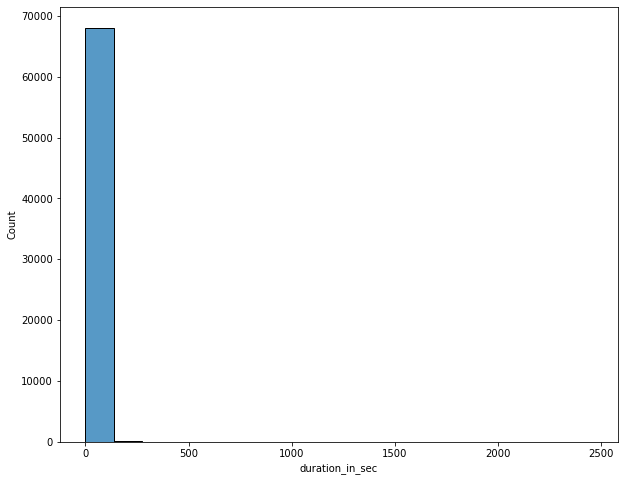

In [37]:
plt.figure(figsize=(10,8))
sns.histplot(data["duration_in_sec"])
plt.show()

Conclusion:- The data is cleaned and has no Null values. Here the agents holding agentIds are the best agent fir this organization. We can find that some agents has more attempts to lead the team and convince leads with their best measures.

## 7. Simple rating algorithm based on count of number of leads

In [38]:
# Getting the values of leadId

data['leadId'].value_counts().index.values

array([ 6572, 53123, 53139, ..., 56848,  2987, 26982], dtype=int64)

In [39]:
# Naming the best lead as "top_index"

top_index = data['leadId'].value_counts().index.values

In [40]:
# Getting the data from followup_date as a month

data['followup_month'] = pd.DatetimeIndex(data['followup_date']).month

In [41]:
# Getting the number of agents holding agentId = 10

agent_10= data[data['agentId']==10]

In [42]:
agent_10["followup_month"].value_counts()

1     2048
3     1912
12    1588
8     1166
11    1077
7      864
2      782
9      658
10     520
6      373
5      364
4      303
Name: followup_month, dtype: int64

In [43]:
# Getting the number of agents holding agentId = 4

agent_4= data[data['agentId']==4]
agent_4["followup_month"].value_counts()

2     2250
7     1627
1     1615
10    1557
11    1552
9     1181
4     1155
3     1086
8     1045
6      809
12     748
5      665
Name: followup_month, dtype: int64

In [44]:
# Getting the number of agents holding agentId = 9


agent_9= data[data['agentId']==9]
agent_9["followup_month"].value_counts()

1     1293
7     1134
12    1100
6      863
8      833
2      717
11     668
9      639
10     585
3      576
4      491
5      382
Name: followup_month, dtype: int64

Top 3 months to get leads are June, Jan and Feb

## 8. Developing basic rating algorithm to Identify top 3 agents

In [45]:
index_list = []
for index in range(4):
    index_list.append(top_index[index])

In [46]:
print(index_list)

[6572, 53123, 53139, 53175]


In [47]:
lst = []
for agent in range(4):
    lst.append(data['agentId'][agent])

In [48]:
print(lst)

[10, 10, 4, 9]


In [49]:
top_lst = []
for agent in range(len(data['agentId'])):
    top_lst.append(data['agentId'][agent])

In [50]:
print(top_lst)

[10, 10, 4, 9, 9, 4, 4, 4, 7, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 8, 9, 10, 4, 4, 8, 8, 8, 8, 2, 2, 2, 4, 4, 10, 10, 10, 9, 9, 9, 9, 9, 9, 4, 4, 4, 9, 9, 4, 4, 9, 9, 9, 9, 9, 4, 8, 4, 4, 6, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 4, 4, 10, 9, 9, 6, 4, 4, 9, 4, 4, 4, 4, 4, 4, 4, 6, 9, 9, 9, 4, 10, 8, 10, 4, 4, 4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 9, 7, 7, 4, 10, 9, 9, 10, 9, 10, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 10, 8, 8, 8, 8, 4, 4, 9, 9, 2, 4, 6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 8, 9, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 4, 4, 10, 10, 6, 4, 4, 4, 4, 6, 7, 7, 7, 8, 8, 10, 9, 7, 7, 10, 10, 10, 8, 4, 4, 4, 10, 4, 4, 4, 9, 9, 9, 4, 9, 9, 4, 8, 9, 6, 6, 4, 4, 4, 7, 4, 4, 4, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 4, 4, 4, 8, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 9, 10, 4, 4, 4, 4, 9, 9, 9, 9, 9, 10, 4, 4, 6, 7, 4, 4, 4, 4, 9, 9, 4, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 2, 10, 7, 7, 4, 10, 9, 4, 4, 7, 9, 9, 9, 9, 9, 4, 9, 9, 9,

In [51]:
lst = np.array(lst)
top_index = np.unique(lst)
top_index = pd.DataFrame(top_index)

In [52]:
top_index

,0
0,4
1,9
2,10


In [53]:
dict = {}
i = 6
for each in range(4):
    dict[lst[each]] = i
    i-=1
    

In [54]:
print(dict)

{10: 5, 4: 4, 9: 3}


In [55]:
rating_df = pd.DataFrame([dict])

In [56]:
# Column name is agentId with its record data as ratings

print(rating_df)

   10  4   9 
0   5   4   3


From here we can infer that agents with agentId 4, 9 & 10 have the highest leads.

## 7. Graphical analysis of the each columns
        1. group of unique leadId
        2. corresponding agenid( on x axis) should be considered, then plot the graph line, barplot, scatterplot
        3. group of unique leadId on y axis vs is_incoming on x axis using bar plot
        4. x axis = year of lead_created_at and y axis = count of leadId corresponding to the years
        5. agentId vs year of lead created
        6. agentId vs duration_in_sec

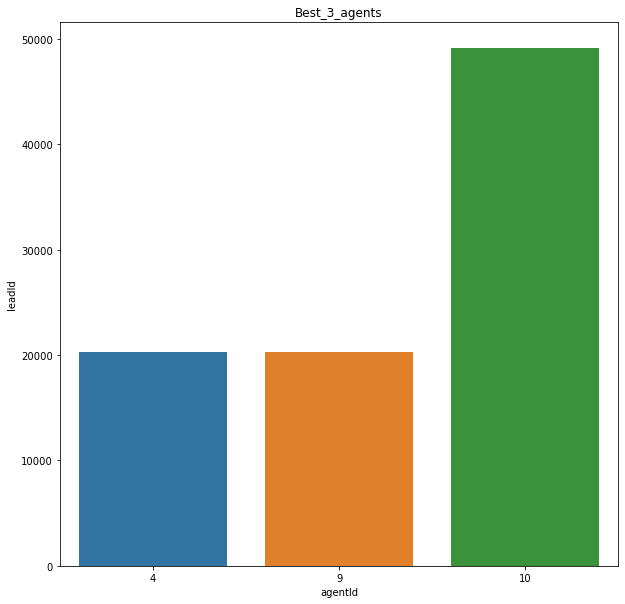

In [57]:
# Using barplot

data.groupby(data['agentId'])
plt.figure(figsize=(10,10))
sns.barplot(x=top_index[0], y=data['leadId'])
plt.xlabel("agentId")
plt.ylabel("leadId")
plt.title("Best_3_agents")
plt.show()

So with the help of barplot, here we have top 3 agents with agentId 4, 9 & 10. Where agent with agentId has maximum record.

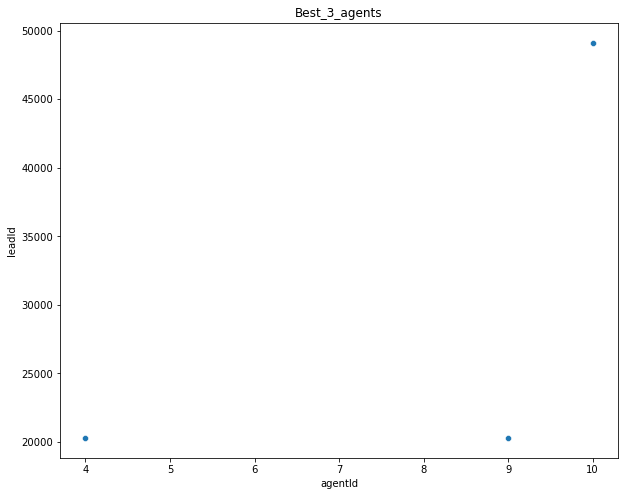

In [58]:
# Using scatterplot

data.groupby(data['agentId']).sum()
plt.figure(figsize=(10,8))
sns.scatterplot(x=top_index[0], y=data['leadId'])
plt.xlabel("agentId")
plt.ylabel("leadId")
plt.title("Best_3_agents")
plt.show()

C:\Users\Binita Mandal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


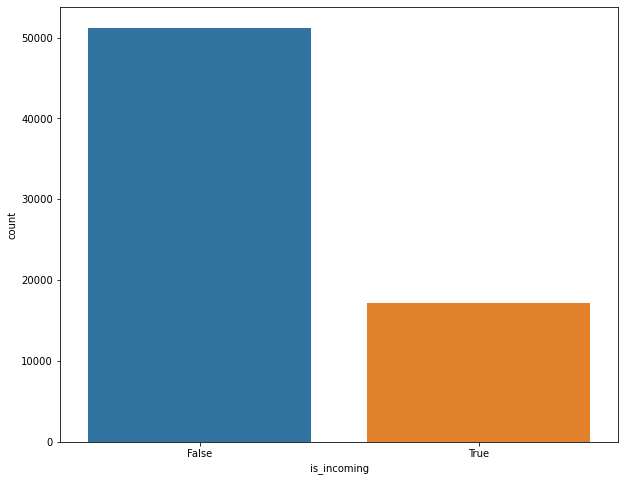

In [59]:
# Barplot for "is_incoming"

plt.figure(figsize=(10,8))
sns.countplot(data["is_incoming"])
plt.show()

Here the call made are more than the othe means of measures.

C:\Users\Binita Mandal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


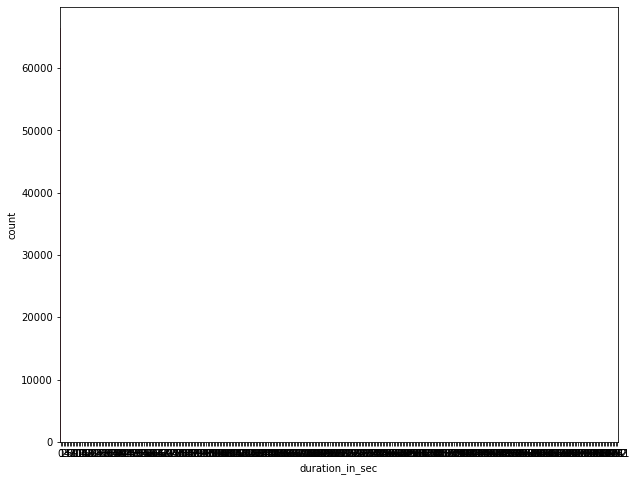

In [60]:
plt.figure(figsize=(10,8))
sns.countplot(data["duration_in_sec"])
plt.show()

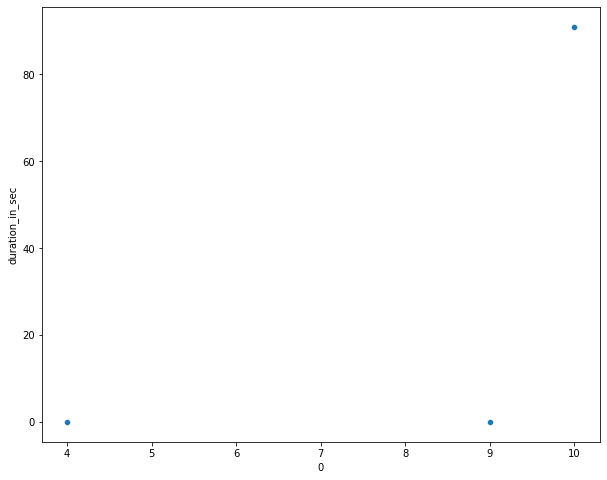

In [61]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = top_index[0], y=data["duration_in_sec"])
plt.show()

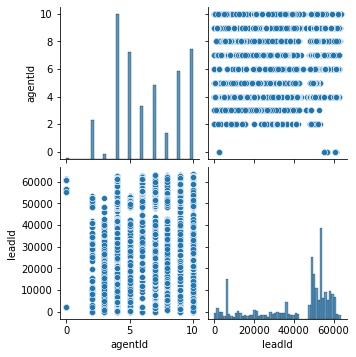

In [62]:
# Plotting the pariplot

sns.pairplot(data[['agentId', 'leadId', 'lead_created_at']])

Following all the above measures, we can have few recommendation to our agents, which are,

    1. Top 3 months to get leads are June, Jan and Feb, so the sales can be carried out on those months to get higher rating,
    2. The maximum followups are carried out via emails compare to the other two measures, so having equal response will boost the business growth,
    3. The maximum time spend with the lead will help the agents to make a deal successful and satisfactory.